<a href="https://colab.research.google.com/github/Vishal-stack-python/Vishal-stack-python/blob/main/House_Price_Prediction_in_Chennai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the 'Chennai_housing_sale.csv' file:


Saving Chennai_housing_sale.csv to Chennai_housing_sale.csv
Missing Values:
 PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64


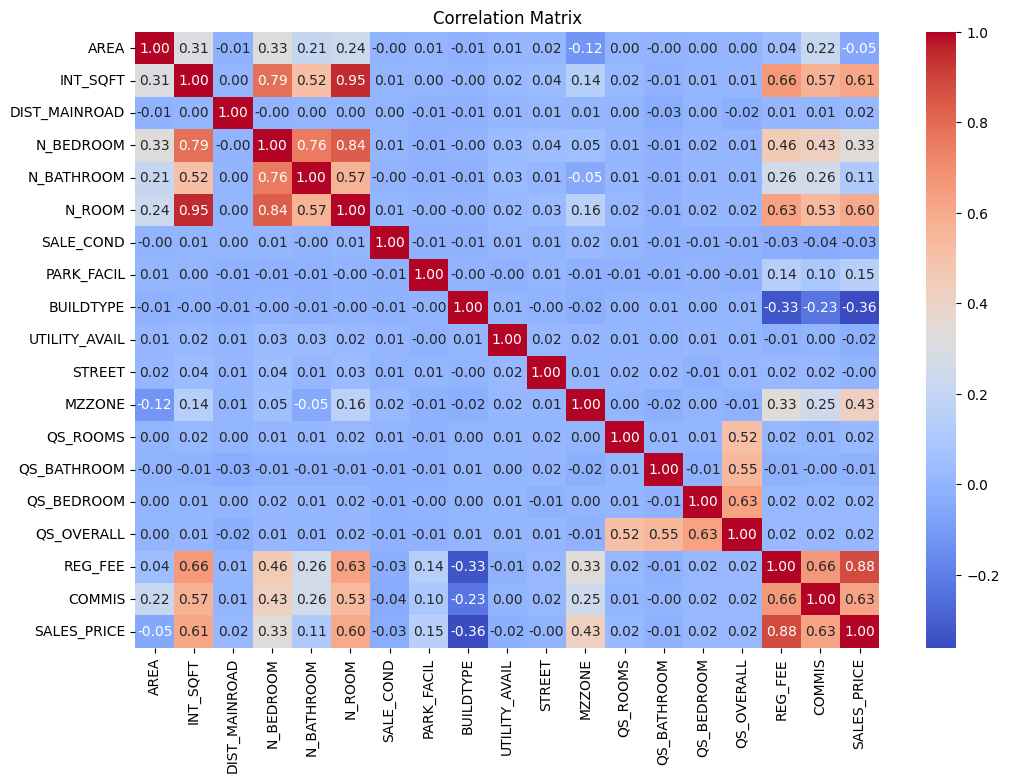

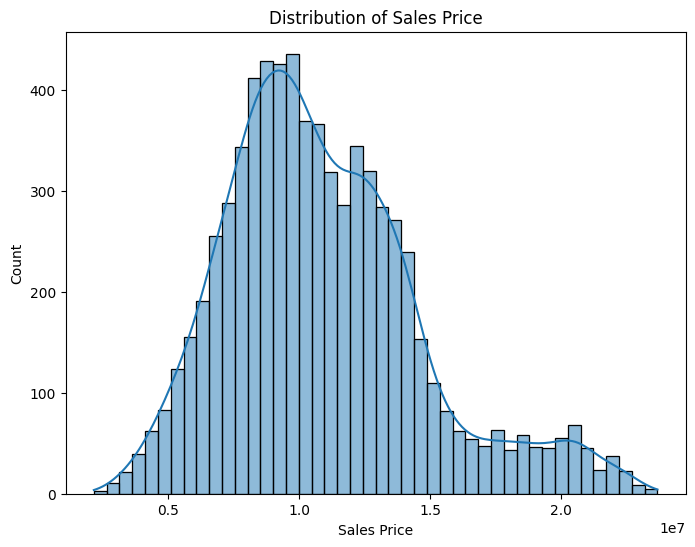

Mean Squared Error: 415117236658.86
Root Mean Squared Error: 644295.92
R2 Score: 0.97


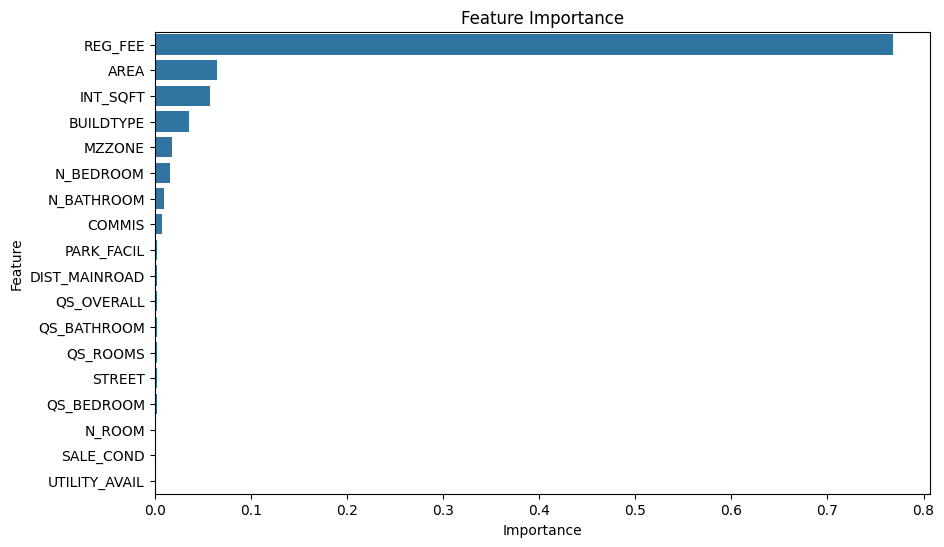

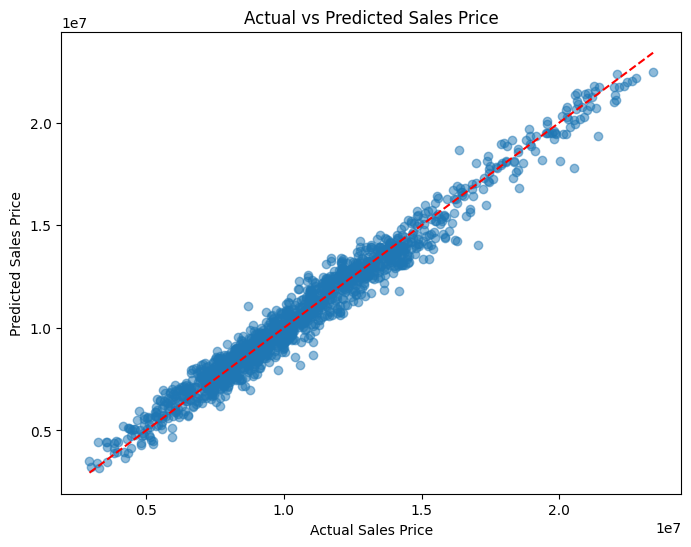

In [ ]:
# House Price Prediction in Chennai
# This project uses a Random Forest Regressor to predict house prices based on the Chennai housing dataset.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Upload the dataset(save the dataset as Chennai_housing_sale.csv)
print("Please upload the 'Chennai_housing_sale.csv' file:")
uploaded = files.upload()

# Verify the uploaded file
file_name = 'Chennai_housing_sale.csv'
if file_name not in uploaded:
    raise FileNotFoundError(f"The file '{file_name}' was not uploaded. Please upload the correct file.")

# Load the dataset
data = pd.read_csv(file_name)

# Display first few rows
data.head()

# Data Preprocessing
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Fill missing values
data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0], inplace=True)
data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0], inplace=True)
data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean(), inplace=True)

# Drop irrelevant columns
data = data.drop(['PRT_ID', 'DATE_SALE', 'DATE_BUILD'], axis=1)

# Encode categorical variables
categorical_cols = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Feature and target separation
X = data.drop('SALES_PRICE', axis=1)
y = data['SALES_PRICE']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Sales Price
plt.figure(figsize=(8, 6))
sns.histplot(data['SALES_PRICE'], kde=True)
plt.title('Distribution of Sales Price')
plt.xlabel('Sales Price')
plt.show()

# Model Training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': data.drop('SALES_PRICE', axis=1).columns,
    'Importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Sales Price')
plt.title('Actual vs Predicted Sales Price')
plt.show()